# INTRODUCTION

Financial Fraud Detection aims to predict a fraudulent money transaction which is based on sample of real transactions extracted from one month of financial logs from a mobile money service implementation in an African country. This fraud detection system has ‘isFraud’ as the target variable which is detected based on a number of features present in the dataset like the type of transaction made, the amount being transferred, the balance before and after transaction of the person transferring the money and the person who receives the money.

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import linear_model, metrics 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

# SETTING THE THEME OF THE PLOTS

In [2]:
import matplotlib.style as style 
style.use('seaborn-poster') 
style.use('ggplot')

# Reading the dataset into a pandas Dataframe and viewing the data

In [3]:
df=pd.read_csv("/Users/ramulyarao/Downloads/paysim.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#checking the number of rows and columns in the dataframe
df.shape

(6362620, 11)

There are 6362620 rows and 11 columns in the dataframe

In [4]:
#getting information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


There is only one categorical feature in the dataset which is is the type of transaction

# Describing the Features of the dataset

1. **Step**-A timestamp / date variable that has been made arbitrary for data privacy.

2. **type**-It indicates the type of transaction.
     Type is our only categorical independent variable. 
     Categories include cash_in, cash_out, 
     debit, payment, transfer.

3. **amount**-It is the size of transaction.

4. **nameOrig**-Customer who made the transaction

5. **oldbalanceOrg**-Initial balance before the transaction

6. **newbalanceOrig**-New balance after the transaction

7. **nameDest**-Customer who is the recipient of the transaction, C = Client, M = Merchant

8. **oldbalanceDest**-Initial balance of recipient before the transaction.

9. **newbalanceDest**-New balance of recipient after the transaction.

10. **isFraud**-It is the target variable. It tells whether the transaction was made by a 
        fraudulent agent. 1 indicates fraudulent transaction, 
        0 indicates non fraudulent transaction

11. **isFlaggedFraud**-It tells whether the transaction was flagged as fraud by the "business model".

In [7]:
#describing the dataframe 
dfDescription = []

for i in df.columns:
    dfDescription.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        df[i].nunique(),
        df[i].drop_duplicates().head(4).values
    ])
#print(df.shape[0])
pd.DataFrame(data = dfDescription, columns = ['Features', 'Data types', 'Null values','No of Unique values', 'Unique Value'])

,Features,Data types,Null values,No of Unique values,Unique Value
0,step,int64,0,743,"[1, 2, 3, 4]"
1,type,object,0,5,"[PAYMENT, TRANSFER, CASH_OUT, DEBIT]"
2,amount,float64,0,5316900,"[9839.64, 1864.28, 181.0, 11668.14]"
3,nameOrig,object,0,6353307,"[C1231006815, C1666544295, C1305486145, C84008..."
4,oldbalanceOrg,float64,0,1845844,"[170136.0, 21249.0, 181.0, 41554.0]"
5,newbalanceOrig,float64,0,2682586,"[160296.36, 19384.72, 0.0, 29885.86]"
6,nameDest,object,0,2722362,"[M1979787155, M2044282225, C553264065, C38997010]"
7,oldbalanceDest,float64,0,3614697,"[0.0, 21182.0, 41898.0, 10845.0]"
8,newbalanceDest,float64,0,3555499,"[0.0, 40348.79, 157982.12, 51513.44]"
9,isFraud,int64,0,2,"[0, 1]"


In [8]:
#Summary of statistics pertaining to the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [10]:
#checking for null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

At initial inspection we see that there are no null values in the dataset

In [11]:
#correlation matrix
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

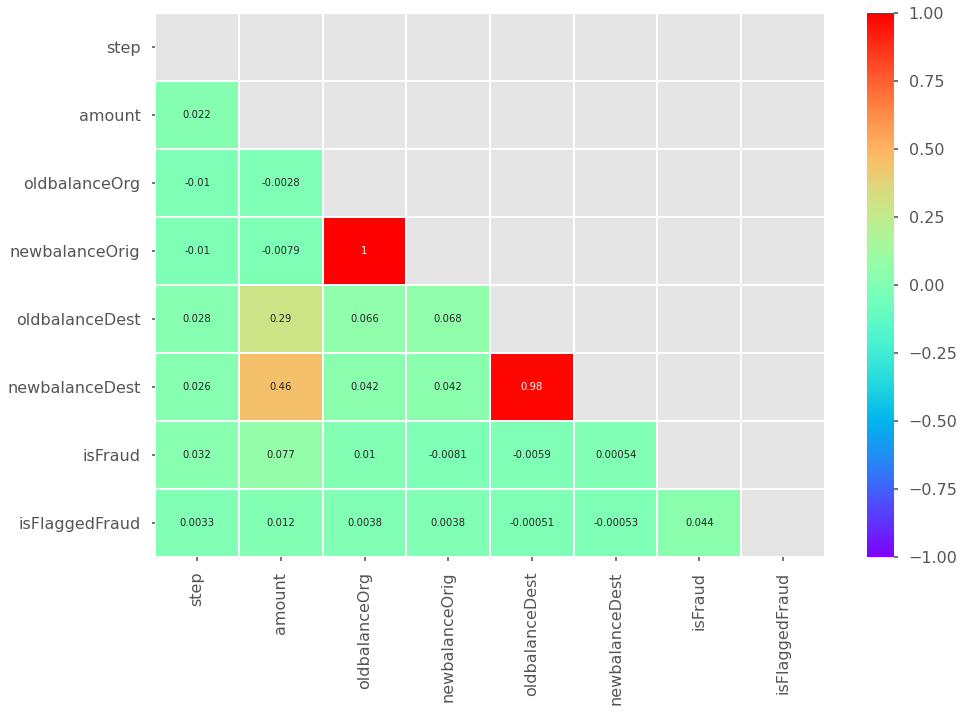

In [17]:
corr_matrix = df.corr()
mask = np.triu(corr_matrix)
plt.subplots(figsize=(15,10))
sns.heatmap(data = corr_matrix, vmin = -1, vmax = 1, linewidths = 1, linecolor = 'white',
            cmap = 'rainbow', mask = mask, annot = True)

# DATA CLEANING

In [18]:
#to check if there are any zero values in the different types of transactions for oldbalanceOrg  and newbalanceOrig
df[(df['type']=='PAYMENT') & (df['oldbalanceOrg']==0) & (df['newbalanceOrig']==0) & (df['amount']!=0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
29,1,PAYMENT,9920.52,C764826684,0.0,0.0,M1940055334,0.0,0.0,0,0
30,1,PAYMENT,3448.92,C2103763750,0.0,0.0,M335107734,0.0,0.0,0,0
31,1,PAYMENT,4206.84,C215078753,0.0,0.0,M1757317128,0.0,0.0,0,0
32,1,PAYMENT,5885.56,C840514538,0.0,0.0,M1804441305,0.0,0.0,0,0
33,1,PAYMENT,5307.88,C1768242710,0.0,0.0,M1971783162,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6355956,709,PAYMENT,17274.64,C1145612250,0.0,0.0,M1690894052,0.0,0.0,0,0
6355957,709,PAYMENT,20380.42,C619971661,0.0,0.0,M1289697387,0.0,0.0,0,0
6355981,709,PAYMENT,5387.46,C460753297,0.0,0.0,M573565290,0.0,0.0,0,0
6355984,709,PAYMENT,3837.05,C1751522910,0.0,0.0,M903863937,0.0,0.0,0,0


In [19]:
df[(df['type']=='CASH_IN') & (df['oldbalanceOrg']==0) & (df['newbalanceOrig']==0) & (df['amount']!=0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [20]:
df[(df['type']=='CASH_OUT') & (df['oldbalanceOrg']==0) & (df['newbalanceOrig']==0) & (df['amount']!=0)]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
48,1,CASH_OUT,5346.89,C512549200,0.0,0.0,C248609774,652637.00,6453430.91,0,0
106,1,CASH_OUT,28404.60,C2091072548,0.0,0.0,C1282788025,51744.00,0.00,0,0
107,1,CASH_OUT,75405.10,C263053820,0.0,0.0,C1870252780,104209.00,46462.23,0,0
108,1,CASH_OUT,50101.88,C1740826931,0.0,0.0,C97730845,67684.00,9940339.29,0,0
109,1,CASH_OUT,14121.82,C69062746,0.0,0.0,C100555887,52679.00,10963.66,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6355302,709,CASH_OUT,15760.39,C630009594,0.0,0.0,C438803880,26961.24,42721.63,0,0
6355959,709,CASH_OUT,134975.67,C1785098021,0.0,0.0,C1910156479,393564.30,528539.97,0,0
6356000,709,CASH_OUT,104570.26,C606038734,0.0,0.0,C258512603,2890040.30,2994610.55,0,0
6356051,709,CASH_OUT,244966.80,C2092646234,0.0,0.0,C211766342,5254563.09,5499529.89,0,0


In [21]:
df[(df['type']=='TRANSFER') & (df['oldbalanceOrg']==0) & (df['newbalanceOrig']==0) & (df['amount']!=0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
79,1,TRANSFER,77957.68,C207471778,0.0,0.0,C1761291320,94900.00,22233.65,0,0
80,1,TRANSFER,17231.46,C1243171897,0.0,0.0,C783286238,24672.00,0.00,0,0
81,1,TRANSFER,78766.03,C1376151044,0.0,0.0,C1749186397,103772.00,277515.05,0,0
82,1,TRANSFER,224606.64,C873175411,0.0,0.0,C766572210,354678.92,0.00,0,0
83,1,TRANSFER,125872.53,C1443967876,0.0,0.0,C392292416,348512.00,3420103.09,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6355888,709,TRANSFER,320850.95,C1573976819,0.0,0.0,C1169803709,5269023.79,5589874.74,0,0
6355889,709,TRANSFER,356125.69,C1983718805,0.0,0.0,C1377991863,504337.26,860462.95,0,0
6355890,709,TRANSFER,675523.93,C1428911688,0.0,0.0,C1163550147,3394024.85,4069548.78,0,0
6355891,709,TRANSFER,273051.66,C2035190075,0.0,0.0,C1404837226,510576.10,783627.75,0,0


In [22]:
df[(df['type']=='DEBIT') & (df['oldbalanceOrg']==0) & (df['newbalanceOrig']==0) & (df['amount']!=0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
330,1,DEBIT,7344.92,C334593716,0.0,0.0,C485041780,185432.00,0.00,0,0
3388,2,DEBIT,3476.19,C1899938605,0.0,0.0,C392292416,5056707.37,4450740.26,0,0
6240,6,DEBIT,1322.22,C948849701,0.0,0.0,C453211571,5468321.58,5950433.65,0,0
12752,7,DEBIT,3600.31,C228404286,0.0,0.0,C648021642,85838.00,324340.80,0,0
12753,7,DEBIT,10244.28,C371410765,0.0,0.0,C1629709129,23372.00,317588.81,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6339973,692,DEBIT,7894.44,C1450466839,0.0,0.0,C884211135,526902.49,534796.93,0,0
6339974,692,DEBIT,3374.15,C1689196627,0.0,0.0,C536248484,3539.95,6914.10,0,0
6339975,692,DEBIT,5436.05,C1343092565,0.0,0.0,C140725940,2923330.18,2928766.23,0,0
6339976,692,DEBIT,869.82,C121781769,0.0,0.0,C867062506,461331.84,462201.66,0,0


In [23]:
#checking if the money adds up and then making a copy of it 
copy = df.loc[(df['oldbalanceOrg']==0)&((df['newbalanceDest'] - df['amount']) == df['oldbalanceDest'])&(df['amount']!=0),'amount'].values

In [24]:
#fill oldBalanceOrig  in rows where newbalanceDest-amount=oldBalancedest
df.loc[((df['oldbalanceOrg']==0)&((df['newbalanceDest'] - df['amount']) == df['oldbalanceDest'])&(df['amount']!=0)),'oldbalanceOrg'] = copy


In [17]:
#randomly checking a row for its correctness
df.iloc[[6355888]]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6355888,709,TRANSFER,320850.95,C1573976819,320850.95,0.0,C1169803709,5269023.79,5589874.74,0,0


In [29]:
df.iloc[[6344516]]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6344516,692,DEBIT,487.0,C68737032,487.0,0.0,C1096000165,114767.23,115254.23,0,0


In [30]:
#dropping those rows where the oldbalanceOrig and newbalanceOrig are zero and the transaction is nonfruad
df.drop(df.loc[(df['oldbalanceOrg']==0) & (df['newbalanceOrig']==0) & (df['amount']!=0) & (df['isFraud']==0)].index, inplace=True)

In [31]:
#to verify if it has been dropped
df.loc[(df['oldbalanceOrg']==0) & (df['newbalanceOrig']==0) & (df['amount']!=0) & (df['isFraud']==0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [32]:
# resetting the index after dropping the rows
df.reset_index(inplace=True)

In [33]:
#correlation matrix after dropping the rows
df.corr()


,index,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
index,1.000000,0.963867,0.026234,-0.009654,-0.012047,0.035699,0.035314,0.023373,0.002410
step,0.963867,1.000000,0.023986,-0.014288,-0.016473,0.032391,0.031605,0.035449,0.003712
amount,0.026234,0.023986,1.000000,0.067258,-0.011042,0.218304,0.370556,0.101860,0.016333
oldbalanceOrg,-0.009654,-0.014288,0.067258,1.000000,0.992785,0.102909,0.087722,0.006570,0.003713
newbalanceOrig,-0.012047,-0.016473,-0.011042,0.992785,1.000000,0.078686,0.051843,-0.011544,0.003682
oldbalanceDest,0.035699,0.032391,0.218304,0.102909,0.078686,1.000000,0.980540,-0.006965,-0.000602
newbalanceDest,0.035314,0.031605,0.370556,0.087722,0.051843,0.980540,1.000000,0.000785,-0.000625
isFraud,0.023373,0.035449,0.101860,0.006570,-0.011544,-0.006965,0.000785,1.000000,0.044100
isFlaggedFraud,0.002410,0.003712,0.016333,0.003713,0.003682,-0.000602,-0.000625,0.044100,1.000000


<AxesSubplot:>

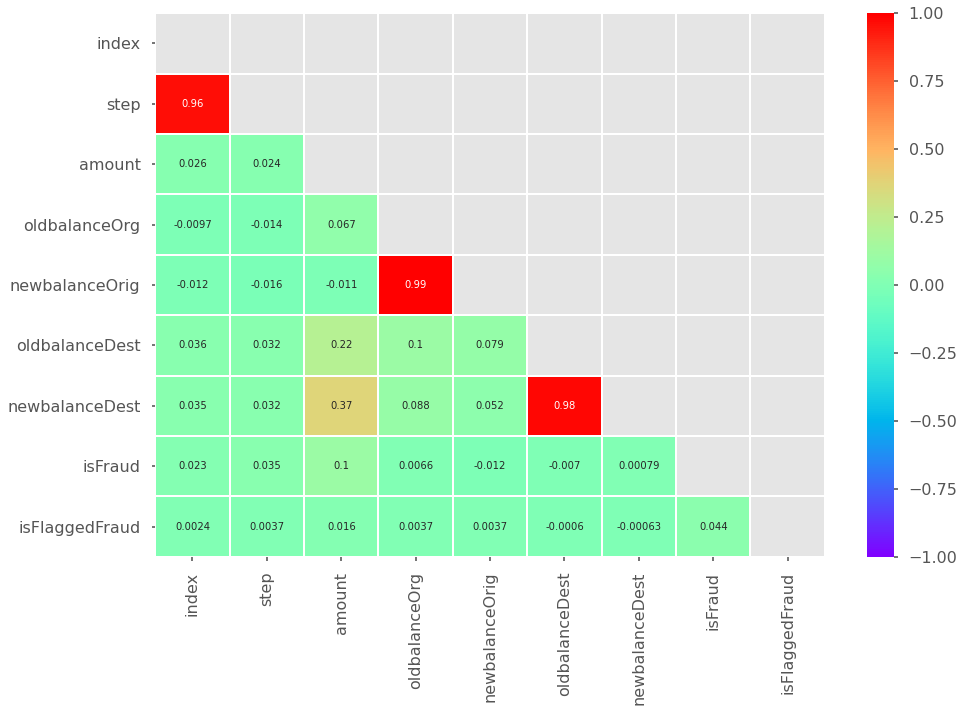

In [34]:
#plotting the correlation matrix
corr_matrix = df.corr()
mask = np.triu(corr_matrix)
plt.subplots(figsize=(15,10))
sns.heatmap(data = corr_matrix, vmin = -1, vmax = 1, linewidths = 1, linecolor = 'white',
            cmap = 'rainbow', mask = mask, annot = True)

In [35]:
df.shape

(4863726, 12)

In [36]:
df.head()

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# EXPLORATORY DATA ANALYSIS

0    4855513
1       8213
Name: isFraud, dtype: int64


/Users/ramulyarao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


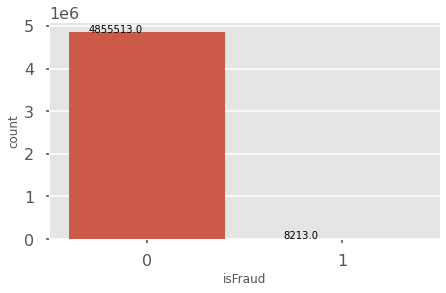

In [37]:
#checking the number of fraudulent and non-fraudulent transactions via a bar graph
print(df.isFraud.value_counts())
plt.figure(figsize=(7,4))
ax=sns.countplot(df.isFraud)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))


   Fraud Percentage
0         99.831138
1          0.168862


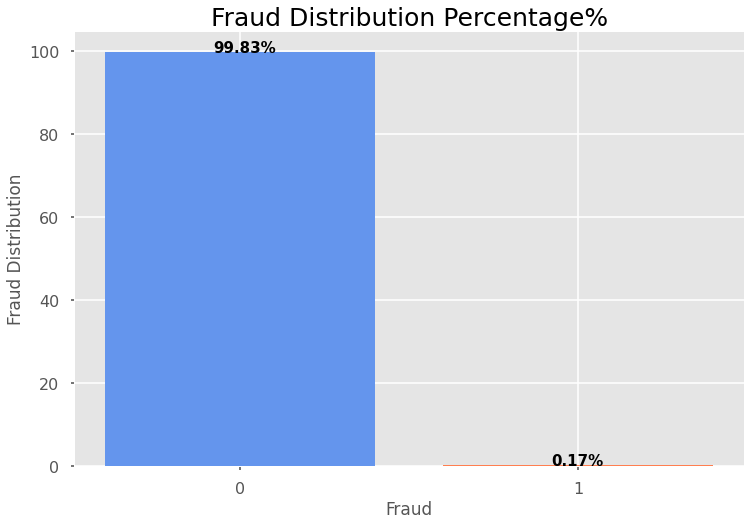

In [38]:
#visualising the fraud percentage
df1=pd.DataFrame(df['isFraud'].value_counts())
df2= pd.DataFrame(df1, 
                   columns = ['isFraud',
                   ])
df2['Fraud Percentage'] = (df2['isFraud'] / 
                      df2['isFraud'].sum()) * 100

df3=df2.drop('isFraud',axis=1)
print(df3)
Fraud=round(df3,2)
Fraud
x=Fraud.index
y=Fraud.values
y=y.reshape(-1)
plt.figure(figsize=(12,8))  
plt.bar(x, y,color=['cornflowerblue','coral']);
plt.xlabel('Fraud',fontdict={'fontsize': 17})
plt.ylabel('Fraud Distribution',fontdict={'fontsize': 17}) 
plt.title('Fraud Distribution Percentage%', fontdict={'fontsize': 25})
for i, v in enumerate(y):   
    plt.text(i-0.08,v+0,f'{v}%',fontweight='bold',color='black',fontsize=15)
plt.xticks([0,1])
plt.show()

# Observation

From the above bar graph we can see that the dataset is skewed i.e., number of non-fraud transactions are more as compared to fraud transactions which is very minimal in comparison.

In [39]:
#Adding another column called 'transactionBetween' to analyse between Clients and Merchants
df['transactionBetween'] = df['nameDest'].apply(lambda x: 'Customer-Customer' if x[0] == "C" else 'Customer-Merchant')

In [40]:
df.head(5)

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transactionBetween
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,Customer-Merchant
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,Customer-Merchant
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,Customer-Customer
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Customer-Customer
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,Customer-Merchant


/Users/ramulyarao/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


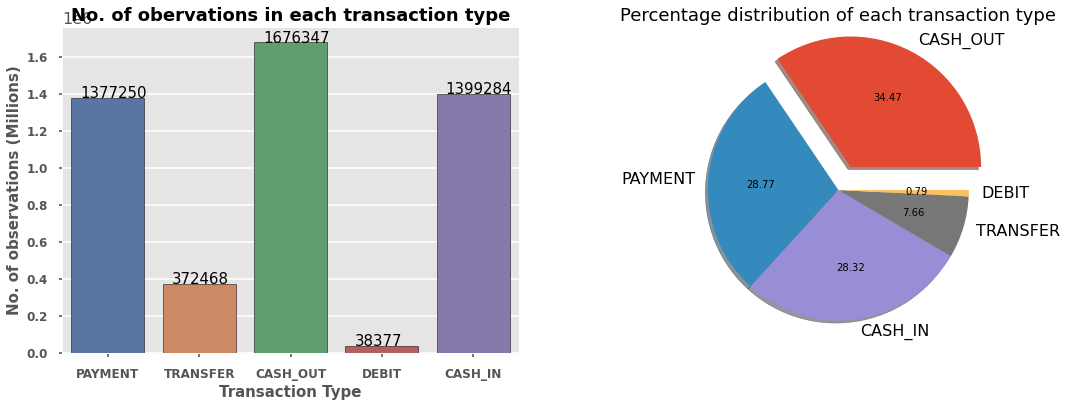

In [52]:
plt.subplots(1,2, figsize=(18,6))
# countplot to visualize the no. of observations under each class
plt.subplot(1,2,1)
ax = sns.countplot(df['type'],palette = 'deep',edgecolor=(0,0,0))
plt.xlabel('Transaction Type', fontsize=15, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.ylabel('No. of observations (Millions)', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('No. of obervations in each transaction type', fontsize=18, fontweight='bold')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height(), str(round(i.get_height(), 2)), fontsize=15, color='black')

    
#pie chart to visualize the percentage distribution of each class
plt.subplot(1,2,2)
myexplode = [0.2, 0, 0, 0,0]
plt.pie(df['type'].value_counts(), labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'], autopct='%.2f',explode = myexplode, shadow = True)
plt.title('Percentage distribution of each transaction type', fontsize=18)

# display plot
plt.show()

# Observation:

Cash_Out and Cash_In account for maximum number of transactions among the different types
Debit card transactions are less than 1%

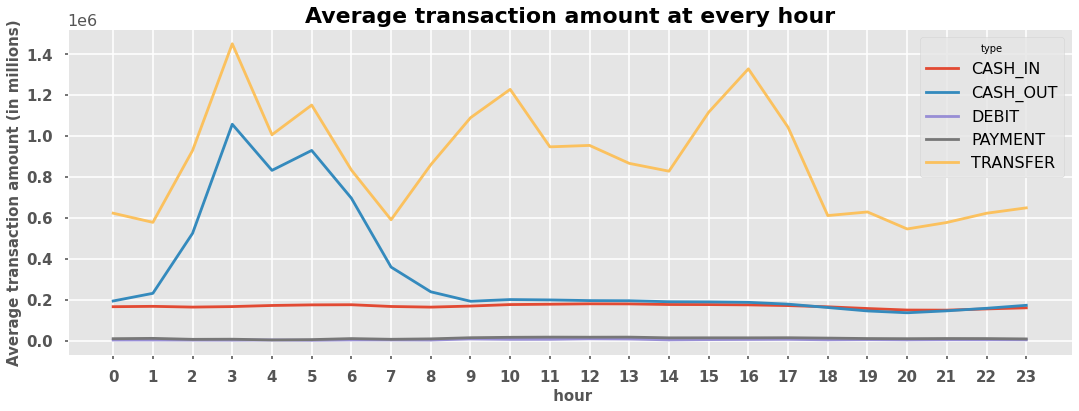

In [53]:
#avg. transaction amount at each hour for each transaction type
plt.figure(figsize=(18,6))
df['hour'] = df['step'] % 24
df['hour'] = df['hour'].astype('object')
sns.lineplot(data=df.groupby(['hour','type']).agg({'amount' : 'mean'}).round(2).reset_index(),
             x='hour',
             y='amount',
             hue='type')
plt.xlabel(' hour', fontsize=15, fontweight='bold')
plt.xticks(range(24), range(24),fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('Average transaction amount (in millions)', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Average transaction amount at every hour', fontsize=22, fontweight='bold')
plt.show()

# Observation:

We can see that TRANSFER and CASH_OUT type of transactions only occur throughout the day with its peak at early morning 3 am and at 4pm in the evening
So these are the hours during which major transactions happen.The other types of transactions show no activity throught the day

In [54]:
#checking which type of transactions cause Frauds
df4=df.loc[(df['isFraud']==1),'type'].value_counts()
df4

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


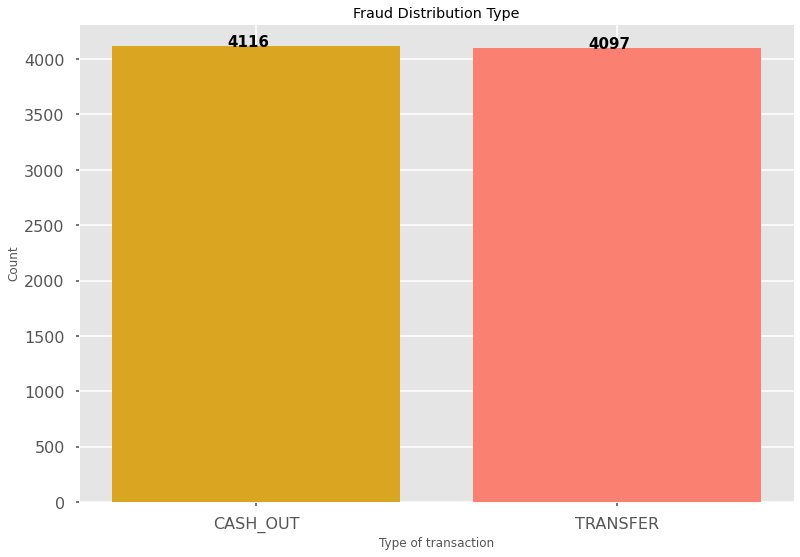

In [55]:
#visualising the type of transactions that casue frauds
df4=df.loc[(df['isFraud']==1),'type'].value_counts()
print(df4)
x=df4.index
y=df4.values
plt.bar(x,y,color=['goldenrod','salmon'])
plt.xlabel("Type of transaction")
plt.ylabel("Count")
plt.title("Fraud Distribution Type")
for i, v in enumerate(y):   
    plt.text(i-0.08,v+0,f'{v}',fontweight='bold',color='Black',fontsize=15)
plt.show()


# Observation:


From the above bar graph we see that only the transaction types 'CASH_OUT' and 'TRANSFER' cause frauds We can drop the rows with transcation types of payment,debit and cash_in when modelling

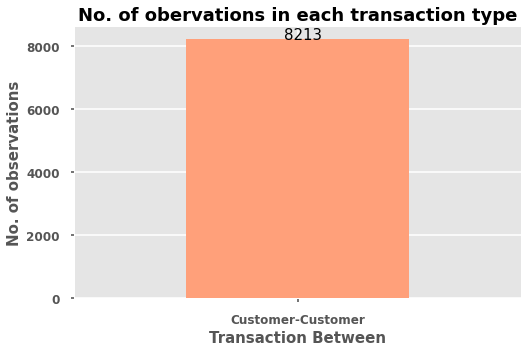

In [60]:
plt.figure(figsize=(8,5))
df_fraud=df[df['isFraud'] == 1]
ax=df_fraud.groupby('transactionBetween').size().plot(kind='bar',color='lightsalmon')
plt.xlabel('Transaction Between', fontsize=15, fontweight='bold')
plt.xticks(rotation=0, fontsize=12, fontweight='bold')
plt.ylabel('No. of observations', fontsize=15, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title('No. of obervations in each transaction type', fontsize=18, fontweight='bold')
for i in ax.patches:

    ax.text(i.get_x()+0.22, i.get_height()+3, str(round(i.get_height(), 2)), fontsize=15, color='black')

plt.show()

# Observation:

All the fradulent transactions are between customer to customer only

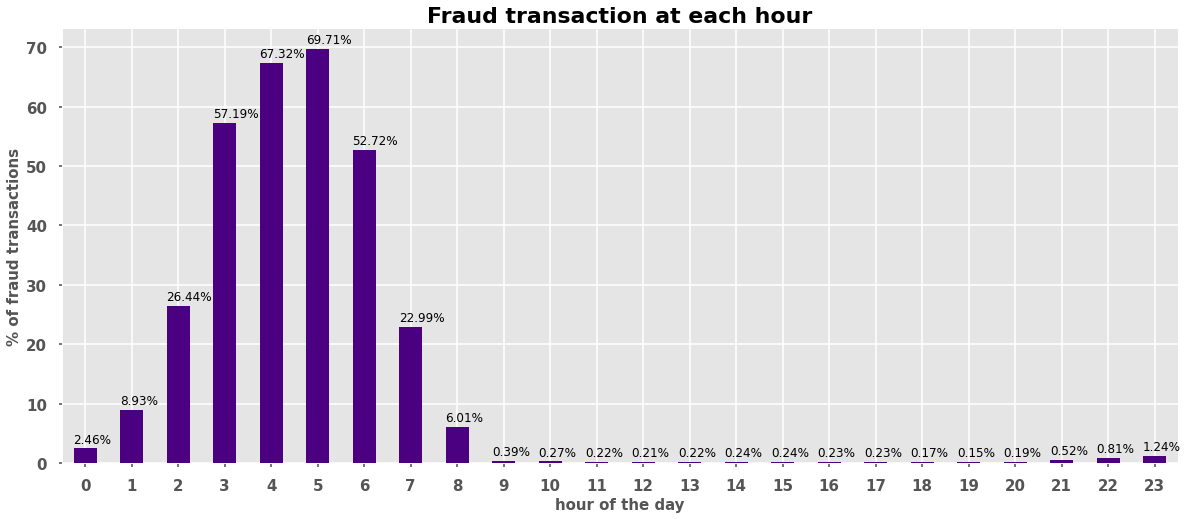

In [61]:
plt.figure(figsize=(20,8))
df_nonfraud = df[(df['isFraud'] == 0) & (df['type'].isin(['CASH_OUT','TRANSFER']))]
df_new = pd.concat([df_fraud, df_nonfraud], axis=0)
ax=(df_fraud.groupby('hour').size() / df_new.groupby('hour').size() * 100).plot(kind='bar',color='indigo')
plt.xlabel('hour of the day', fontsize=15, fontweight='bold')
plt.xticks(range(24), range(24),fontsize=15, fontweight='bold', rotation=0)
plt.ylabel('% of fraud transactions', fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.title('Fraud transaction at each hour', fontsize=22, fontweight='bold')
for i in ax.patches:
    
    ax.text(i.get_x(), i.get_height()+1, str(round(i.get_height(), 2))+"%", fontsize=12, color='black')

plt.show()

# Observation:

From this above plot we can see that a good percentage of fraud transaction occur during the early hours of the day between 4am and 5am

In [62]:
df.head(5)

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,transactionBetween,hour
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,Customer-Merchant,1
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,Customer-Merchant,1
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,Customer-Customer,1
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Customer-Customer,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,Customer-Merchant,1


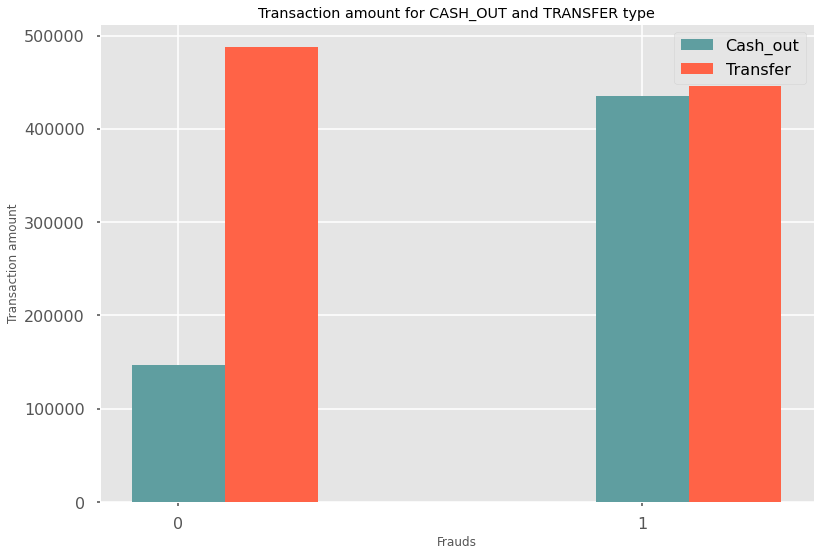

In [70]:
df5=pd.DataFrame(df[df.type=="CASH_OUT"].groupby("isFraud")["amount"].median())
df7=pd.DataFrame(df[df.type=="TRANSFER"].groupby("isFraud")["amount"].median())
w=0.2
Cash_out=df5.values
Cash_out=Cash_out.reshape(-1)
Transfer=df7.values
Transfer=Transfer.reshape(-1)
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
plt.bar(bar1,Cash_out,w,label="Cash_out",color='cadetblue')
plt.bar(bar2,Transfer,w,label="Transfer",color='tomato')
plt.xlabel("Frauds")
plt.ylabel("Transaction amount")
plt.title("Transaction amount for CASH_OUT and TRANSFER type")
plt.legend()
plt.xticks([0,1])
plt.show()

# Observation:

From the above graph we see that when the transaction type is of CASH_OUT and when the amount is the range of 435k thats when the transaction is deemed as fraud 

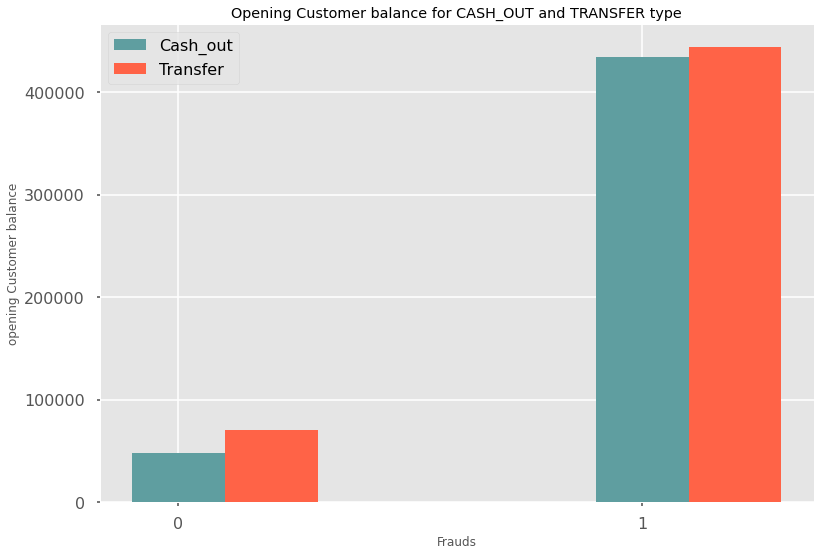

In [69]:
df6=pd.DataFrame(df[df.type=="CASH_OUT"].groupby("isFraud")["oldbalanceOrg"].median())
df8=pd.DataFrame(df[df.type=="TRANSFER"].groupby("isFraud")["oldbalanceOrg"].median())
w=0.2
Cash_out=df6.values
Cash_out=Cash_out.reshape(-1)
Transfer=df8.values
Transfer=Transfer.reshape(-1)
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
plt.bar(bar1,Cash_out,w,label="Cash_out",color='cadetblue')
plt.bar(bar2,Transfer,w,label="Transfer",color='tomato')
plt.xlabel("Frauds")
plt.ylabel("opening Customer balance")
plt.title('Opening Customer balance for CASH_OUT and TRANSFER type')
plt.legend()
plt.xticks([0,1])
plt.show()

# Observation:

When the opening customer balance is of the median range of 430k there are chances of fraudsters attacking the account to steal the money

From the above Exploratory Data Analysis we see that Frauds happen only when the transaction type is CASH_OUT and TRANSFER. Hence before we proceed with the data preparation and modelling, we will first drop the transaction types-CASH_IN,PAYMENT,DEBIT since the fraudulent transactions are noticed in CASH_OUT,TRANSFER

# DATA PREPARATION

In [71]:
#dropping the rows having transaction types other than CASH_OUT and TRANSFER
df.drop(df.loc[(df['type']!='CASH_OUT') & (df['type']!='TRANSFER')].index, inplace=True)
df=df.drop(['hour','transactionBetween'],axis=1)

In [72]:
#resetting the index after dropping
df.reset_index(inplace=True)
print(df.shape)

(2048815, 13)


In [73]:
df.head()

,level_0,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,2,2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
1,3,3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
2,15,15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
3,19,19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
4,24,24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [74]:
#checking the correlation after dropping the transaction types CASH_IN,PAYMENT,DEBIT
df.corr()

,level_0,index,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
level_0,1.000000,0.999996,0.963206,0.038072,0.021854,-0.020145,0.044431,0.045878,0.035697,0.003722
index,0.999996,1.000000,0.963086,0.037983,0.021779,-0.020278,0.044441,0.045857,0.035581,0.003711
step,0.963206,0.963086,1.000000,0.034157,0.020931,-0.017612,0.039298,0.039920,0.054429,0.005740
amount,0.038072,0.037983,0.034157,1.000000,0.670239,0.026623,0.233638,0.422058,0.095653,0.016503
oldbalanceOrg,0.021854,0.021779,0.020931,0.670239,1.000000,0.353983,0.260890,0.354587,0.156363,0.035259
newbalanceOrig,-0.020145,-0.020278,-0.017612,0.026623,0.353983,1.000000,-0.009701,-0.013875,0.061669,0.124115
oldbalanceDest,0.044431,0.044441,0.039298,0.233638,0.260890,-0.009701,1.000000,0.972622,-0.015729,-0.001077
newbalanceDest,0.045878,0.045857,0.039920,0.422058,0.354587,-0.013875,0.972622,1.000000,-0.008460,-0.001212
isFraud,0.035697,0.035581,0.054429,0.095653,0.156363,0.061669,-0.015729,-0.008460,1.000000,0.044049
isFlaggedFraud,0.003722,0.003711,0.005740,0.016503,0.035259,0.124115,-0.001077,-0.001212,0.044049,1.000000


In [75]:
#checking for the number of Fraud and non fruad transactions in dataframe
df['isFraud'].value_counts()

0    2040602
1       8213
Name: isFraud, dtype: int64

In [76]:
#encoding the categorical values in the column 'Type' and 'nameOrig' and 'nameDest'using One Hot Encoding
#importing libraries for OneHotEncoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()

In [77]:
col_to_encode=['type','nameOrig','nameDest']
for col in col_to_encode:
    df[col] = labelencoder.fit_transform(df[col])
    labelencoder = LabelEncoder()
df

,level_0,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,2,2,1,1,181.00,322489,181.00,0.0,385480,0.00,0.00,1,0
1,3,3,1,0,181.00,1878248,181.00,0.0,343388,21182.00,0.00,1,0
2,15,15,1,0,229133.94,1946976,15325.00,0.0,365643,5083.00,51513.44,0,0
3,19,19,1,1,215310.30,709592,705.00,0.0,26098,22425.00,0.00,0,0
4,24,24,1,1,311685.89,1042051,10835.00,0.0,484189,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048810,4863721,6362615,743,0,339682.13,1821190,339682.13,0.0,443467,0.00,339682.13,1,0
2048811,4863722,6362616,743,1,6311409.28,559408,6311409.28,0.0,228642,0.00,0.00,1,0
2048812,4863723,6362617,743,0,6311409.28,171842,6311409.28,0.0,94895,68488.84,6379898.11,1,0
2048813,4863724,6362618,743,1,850002.52,725374,850002.52,0.0,280258,0.00,0.00,1,0


TRANSFER type of transaction has been encoded as 1 and CASH_OUT type of transaction has been encoded as 0

In [78]:
df9=df.copy()

In [79]:
#Dropping useless columns
df9.drop(columns=['level_0','index'],inplace=True)

In [80]:
df9.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,181.00,322489,181.0,0.0,385480,0.0,0.00,1,0
1,1,0,181.00,1878248,181.0,0.0,343388,21182.0,0.00,1,0
2,1,0,229133.94,1946976,15325.0,0.0,365643,5083.0,51513.44,0,0
3,1,1,215310.30,709592,705.0,0.0,26098,22425.0,0.00,0,0
4,1,1,311685.89,1042051,10835.0,0.0,484189,6267.0,2719172.89,0,0


In [81]:
df9.shape

(2048815, 11)

# MODELLING

In [82]:
#importing libraries needed for Logistic Regression modelling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [83]:
#Loading X with features needed for training the model and y with target variable
X=df9.drop(['isFraud','isFlaggedFraud'],axis=1)
y=df9['isFraud']

In [84]:
#splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=4)

In the data preparation step we see there is an imbalance in the target variable.It is skewed i.e., the target variable isFraud has more non-fraud transactions than fraud transactions we will gry to resample the dataset into a more balanced one
After which we will use the resampled values to build various Machine Learning Models

# RESAMPLING

In [85]:
from sklearn.utils import resample

In [86]:
non_fraud_transactions = df9[df9['isFraud'] == 0] 
fraud_transactions = df9[df9['isFraud'] == 1] 


In [87]:
#Since the non-fraud transactions are more in number we are going to scale it down to the level of fraud transactions for better modelling
non_fraud_transactions_undersample = resample(non_fraud_transactions,
                                replace=False,
                                n_samples = len(fraud_transactions),
                                random_state = 21)


In [88]:
#concatinating the resampled non-fraud values with the fraud values
df_UnderSample = pd.concat([non_fraud_transactions_undersample, fraud_transactions])

In [89]:
#now checking the count of fraud and non-fraud transactions
df_UnderSample['isFraud'].value_counts()

1    8213
0    8213
Name: isFraud, dtype: int64

In [90]:
#dropping the target variable 'isFraud' and the column 'isFlaggedFraud'
X_train_new=df_UnderSample.drop(['isFraud','isFlaggedFraud'],axis=1)
y_train_new = df_UnderSample['isFraud']




# LOGISTIC REGRESSION

In [91]:
LR_undersampled=LogisticRegression(random_state = 1, max_iter=500)
LR_undersampled.fit(X_train_new,y_train_new)
y_pred_undersampled=LR_undersampled.predict(X_test)

In [92]:
LR_undersampled.score(X_test,y_test)

0.8598238493958703

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_undersampled)
print('Confusion Matrix : ')
print(cm)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_LR = accuracy_score(y_test, y_pred_undersampled)
print('Logistic Regression Classifier- Accuracy Score : ', acc_LR)

Confusion Matrix : 
[[350900  57186]
 [   253   1424]]

Logistic Regression Classifier- Accuracy Score :  0.8598238493958703


In [94]:
# Mean Squared Error
from sklearn.metrics import f1_score, mean_squared_error
mse_LR = metrics.mean_squared_error(y_test, y_pred_undersampled)
print('Logistic Regression Classifier- Mean Squared Error:', mse_LR)

Logistic Regression Classifier- Mean Squared Error: 0.14017615060412972


# DECISION TREE CLASSIFIER

In [95]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import tree


In [96]:
clf = DecisionTreeClassifier(max_depth=3,random_state=4)
clf.fit(X_train_new, y_train_new)
y_pred_clf=clf.predict(X_test)

In [97]:
clf.score(X_test,y_test)

0.9140405551501721

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_clf)
print('Confusion Matrix : ')
print(cm)
print()
# Get R2 measure (indicator of accuracy 1 is perfect, 0 is horrible)
acc_DF = accuracy_score(y_test, y_pred_clf)
print('Decision Tree Classifier- Accuracy Score : ', acc_DF)

Confusion Matrix : 
[[373081  35005]
 [   218   1459]]

Decision Tree Classifier- Accuracy Score :  0.9140405551501721


In [100]:
mse_DT = metrics.mean_squared_error(y_test, y_pred_clf)
print('Decision Tree Classifier- Mean Squared Error:', mse_DT)

Decision Tree Classifier- Mean Squared Error: 0.08595944484982783


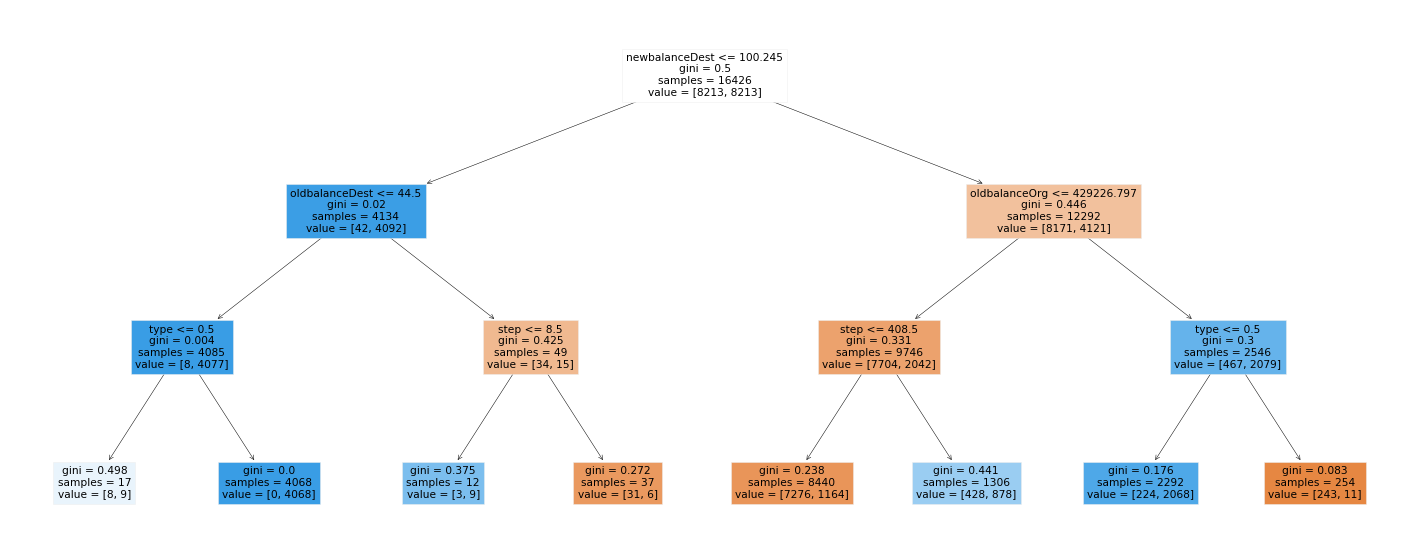

In [101]:
#plotting the decision tree
fn=['step','type','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest']
cn=['isFraud']
plt.figure(figsize=(25,10))
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10), dpi=450)
tree.plot_tree(clf,
               feature_names = fn,
               filled = True);


# RANDOM FOREST CLASSIFIER

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
from sklearn.pipeline import Pipeline

In [109]:
RF_tuned = RandomForestClassifier()
param_RF = {"n_estimators" : [100,500],
          "max_depth" : [1,5,7],
          "min_samples_split" : [10,8],
          "min_samples_leaf" : [2,4,5,3],
          "max_features" : ['auto',.75,.8]}

In [110]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
model_RF_Tuned = GridSearchCV(estimator=RF_tuned, param_grid=param_RF,cv=3, n_jobs=-1, verbose=1, scoring='recall')
model_RF_Tuned.fit(X_train_new, y_train_new)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 5, 7],
                         'max_features': ['auto', 0.75, 0.8],
                         'min_samples_leaf': [2, 4, 5, 3],
                         'min_samples_split': [10, 8],
                         'n_estimators': [100, 500]},
             scoring='recall', verbose=1)

In [111]:
model_RF_Tuned.best_params_

{'max_depth': 1,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [112]:
y_tuned_RF = model_RF_Tuned.predict(X_test)

In [113]:
#calculating the accuracy of Rnadom Forest Classifier
model_RF_Tuned.score(X_test, y_test)

0.774597495527728

In [114]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_tuned_RF)
print('Confusion Matrix : ')
print(cm)
print()
acc_RF = model_RF_Tuned.score(X_test, y_test)
print('Random Forest Classifier- Accuracy Score : ', acc_RF)

Confusion Matrix : 
[[383451  24635]
 [   378   1299]]

Random Forest Classifier- Accuracy Score :  0.774597495527728


In [115]:
#calculating MSE 
mse_RF = metrics.mean_squared_error(y_test, y_tuned_RF)
print('Random Forest Classifier- Mean Squared Error:', mse_RF)

Random Forest Classifier- Mean Squared Error: 0.061042602675204935


# K-NEAREST NEIGHBORS

In [102]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KNN.fit(X_train_new, y_train_new)

KNeighborsClassifier()

In [103]:
y_pred_knn = classifier_KNN.predict(X_test)


In [104]:
classifier_KNN.score(X_test,y_test)

0.8863635808992028

In [105]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
print('Confusion Matrix : ')
print(cm)
print()
acc_KNN = accuracy_score(y_test, y_pred_knn)
print('K-Nearest Neighbors Classifier- Accuracy Score : ', acc_KNN)

Confusion Matrix : 
[[361706  46380]
 [   184   1493]]

K-Nearest Neighbors Classifier- Accuracy Score :  0.8863635808992028


In [120]:
#calculating MSE 
mse_KNN = metrics.mean_squared_error(y_test, y_pred_knn)
print('K-Nearest Neighbor Classifier- Mean Squared Error:', mse_KNN)

K-Nearest Neighbor Classifier- Mean Squared Error: 0.11363641910079729


In [116]:
#representing all the accuracies of different algorithms in a dataframe
data={"Algorithms":['Logistic Regression','Decision Tree','Random Forest','K-NearestNeighbors'],
       "Accuracy":[LR_undersampled.score(X_test,y_test),clf.score(X_test,y_test),model_RF_Tuned.score(X_test,y_test),classifier_KNN.score(X_test,y_test)]}
dataframe=pd.DataFrame(data)
dataframe

,Algorithms,Accuracy
0,Logistic Regression,0.859824
1,Decision Tree,0.914041
2,Random Forest,0.774597
3,K-NearestNeighbors,0.886364


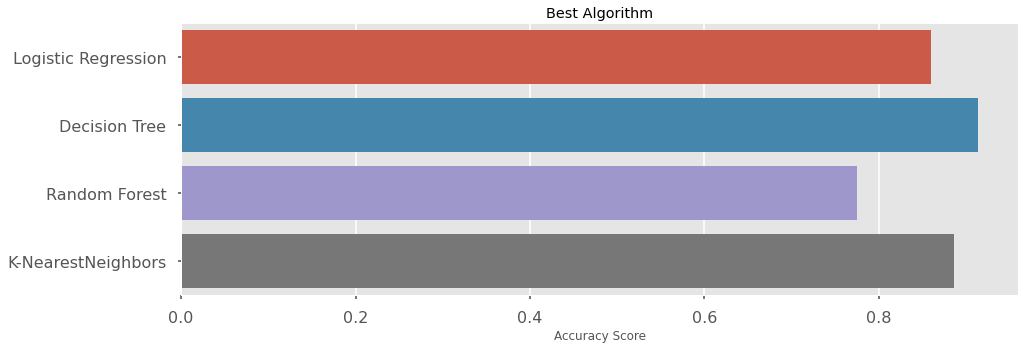

In [119]:
plt.figure(figsize=(15,5)) 
sns.barplot(x=[LR_undersampled.score(X_test,y_test),clf.score(X_test,y_test),model_RF_Tuned.score(X_test,y_test),classifier_KNN.score(X_test,y_test)],
            y=["Logistic Regression","Decision Tree","Random Forest","K-NearestNeighbors"])
plt.xlabel("Accuracy Score")
plt.title("Best Algorithm")
plt.show()

# CONCLUSION:

1. The occurence of a fraudulent transaction is very rare in the given dataset. The distributin is skewed.
2.From the above models used we see that the accuracy score of decision tree classifier is best with the accuracy of 91% in predicting the target variable 'isFraud'
3.From the analysis carried out we see that fraudulent transaction occur only due to cash_out and transfer type of transactions
4.Fraudulent transactions occur between Customer-to-Customer transactions.


In [ ]:
df.head()

In [ ]:
df1=pd.DataFrame(df['isFraud'].value_counts())
df2= pd.DataFrame(df1, 
                   columns = ['isFraud'
                   ])
df2
df2['isFraud Percentage'] = (df2['isFraud'] / 
                      df2['isFraud'].sum()) * 100
df2
df3=df2.drop('isFraud',axis=1)
df3
Fraud=round(df3,2)
Fraud
x=Fraud.index
y=Fraud.values
y=y.reshape(-1)
plt.figure(figsize=(12,8))  
plt.bar(x, y,color=['goldenrod','salmon']);
plt.xlabel('Fraud',fontdict={'fontsize': 17})
plt.ylabel('Fraud Distribution',fontdict={'fontsize': 17}) 
plt.title('Fraud Distribution Percentage%', fontdict={'fontsize': 25})
for i, v in enumerate(y):   
    plt.text(i-0.08,v+0,f'{v}%',fontweight='bold',color='white',fontsize=15)
plt.xticks([0,1])
plt.show()

In [ ]:
Fraud = round(df['isFraud'].value_counts(normalize= True) * 100,2)
x = Fraud.index
y = Fraud.values
y